In [124]:
# Import required libraries
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas

In [125]:
# Read the OHLCV.csv file from the Resources folder into a Pandas DataFrame
# Set the `Date` column as the DateTimeIndex
ohlcv_path = Path("emerging_markets_ohlcv.csv")



In [126]:
ohlcv_df = pd.read_csv(ohlcv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
ohlcv_df = ohlcv_df.sort_index()
ohlcv_df.head()

,open,high,low,close,volume
date,,,,,
2015-01-21 09:30:00,23.83,23.83,23.83,23.83,100
2015-01-21 11:00:00,23.98,23.98,23.98,23.98,100
2015-01-22 15:00:00,24.42,24.42,24.42,24.42,100
2015-01-22 15:15:00,24.42,24.44,24.42,24.44,200
2015-01-22 15:30:00,24.46,24.46,24.46,24.46,200


In [127]:
# Filter the date index and close columns
signals_df = ohlcv_df.loc[:,["close"]]

# Review the DataFrame
signals_df.head()

,close
date,
2015-01-21 09:30:00,23.83
2015-01-21 11:00:00,23.98
2015-01-22 15:00:00,24.42
2015-01-22 15:15:00,24.44
2015-01-22 15:30:00,24.46


In [128]:
# Use hvplot to visualize the data
signals_df.hvplot()

:Curve   [date]   (close)

In [129]:
# Calculate the daily returns using the closing prices and the pct_change function
signals_df["actual_returns"] = signals_df["close"].pct_change()

# Display sample data
signals_df.head()

,close,actual_returns
date,,
2015-01-21 09:30:00,23.83,NaN
2015-01-21 11:00:00,23.98,0.006295
2015-01-22 15:00:00,24.42,0.018349
2015-01-22 15:15:00,24.44,0.000819
2015-01-22 15:30:00,24.46,0.000818


In [130]:
# Set the variables for short window and long window periods
short_window = 4
long_window = 100

In [131]:
# Generate the short and long window simple moving averages (4 and 100 days, respectively)
signals_df["SMA4"] = signals_df["close"].rolling(window=short_window).mean()
signals_df["SMA100"] = signals_df["close"].rolling(window=long_window).mean()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,actual_returns,SMA4,SMA100
date,,,,
2015-01-21 09:30:00,23.83,NaN,NaN,NaN
2015-01-21 11:00:00,23.98,0.006295,NaN,NaN
2015-01-22 15:00:00,24.42,0.018349,NaN,NaN
2015-01-22 15:15:00,24.44,0.000819,24.1675,NaN
2015-01-22 15:30:00,24.46,0.000818,24.3250,NaN


,close,actual_returns,SMA4,SMA100
date,,,,
2021-01-22 09:30:00,33.27,-0.006866,33.2025,30.40215
2021-01-22 11:30:00,33.35,0.002405,33.2725,30.44445
2021-01-22 13:45:00,33.42,0.002099,33.3850,30.48745
2021-01-22 14:30:00,33.47,0.001496,33.3775,30.53085
2021-01-22 15:45:00,33.44,-0.000896,33.4200,30.57495


In [132]:
# Drop the NaNs using dropna()
signals_df = signals_df.dropna()

In [133]:
# Assign a copy of the sma_fast and sma_slow columns to a new DataFrame called X
X = signals_df[['SMA4', 'SMA100']].copy()

# Display sample data
display(X.head())
display(X.tail())

,SMA4,SMA100
date,,
2015-04-02 14:30:00,24.9200,24.3105
2015-04-02 14:45:00,24.9175,24.3214
2015-04-02 15:00:00,24.9200,24.3308
2015-04-02 15:15:00,24.9250,24.3360
2015-04-02 15:30:00,24.9325,24.3411


,SMA4,SMA100
date,,
2021-01-22 09:30:00,33.2025,30.40215
2021-01-22 11:30:00,33.2725,30.44445
2021-01-22 13:45:00,33.3850,30.48745
2021-01-22 14:30:00,33.3775,30.53085
2021-01-22 15:45:00,33.4200,30.57495


In [134]:
# Create a new column in the trading_df called signal setting its value to zero.
signals_df['signal'] = 0.0

In [135]:
# Create the signal to buy
signals_df.loc[(signals_df['actual_returns'] >= 0), 'signal'] = 1

In [136]:
# Create the signal to sell
signals_df.loc[(signals_df['actual_returns'] < 0), 'signal'] = -1

In [137]:
# Copy the new signal column to a new Series called y.
y = signals_df['signal'].copy()

In [138]:
from pandas.tseries.offsets import DateOffset
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2015-04-02 14:30:00


In [139]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2015-07-02 14:30:00


In [140]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Display sample data
X_train.head()

,SMA4,SMA100
date,,
2015-04-02 14:30:00,24.9200,24.3105
2015-04-02 14:45:00,24.9175,24.3214
2015-04-02 15:00:00,24.9200,24.3308
2015-04-02 15:15:00,24.9250,24.3360
2015-04-02 15:30:00,24.9325,24.3411


In [141]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Display sample data
X_test.head()

,SMA4,SMA100
date,,
2015-07-02 15:15:00,24.1300,25.1092
2015-07-02 15:45:00,24.1250,25.0919
2015-07-06 10:00:00,23.9700,25.0682
2015-07-06 10:45:00,23.8475,25.0458
2015-07-06 14:15:00,23.6725,25.0206


In [142]:
# Imports
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler instance
scaler = StandardScaler()
 
# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)
 
# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [143]:
# Imports
from sklearn import svm
from sklearn.metrics import classification_report

# Create the classifier model
svm_model = svm.SVC()
 
# Fit the model to the data using X_train_scaled and y_train
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the trained model to predict the trading signals for the training data
training_signal_predictions = svm_model.predict(X_train_scaled)

# Display the sample predictions
training_signal_predictions[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [144]:
training_report = classification_report(y_train, training_signal_predictions)
print(training_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00        49
         1.0       0.62      1.00      0.77        81

    accuracy                           0.62       130
   macro avg       0.31      0.50      0.38       130
weighted avg       0.39      0.62      0.48       130



C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [145]:
# Use the trained model to predict the trading signals for the testing data.
testing_signal_predictions = svm_model.predict(X_test_scaled)

In [146]:
# Evaluate the model's ability to predict the trading signal for the testing data
svm_testing_report = classification_report(y_test, testing_signal_predictions)
print(svm_testing_report)

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1806
         1.0       0.56      1.00      0.72      2288

    accuracy                           0.56      4094
   macro avg       0.28      0.50      0.36      4094
weighted avg       0.31      0.56      0.40      4094



C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nosta\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
# Create a new empty predictions DataFrame using code provided below.
predictions_df = pd.DataFrame(index=X_test.index)
predictions_df["predicted"] = testing_signal_predictions
predictions_df["actual_returns"] = signals_df["actual_returns"]
predictions_df["strategy_returns"] = predictions_df["actual_returns"] * predictions_df["predicted"]
predictions_df.head()

,predicted,actual_returns,strategy_returns
date,,,
2015-07-02 15:15:00,1.0,-0.000828,-0.000828
2015-07-02 15:45:00,1.0,-0.000829,-0.000829
2015-07-06 10:00:00,1.0,-0.025715,-0.025715
2015-07-06 10:45:00,1.0,0.007237,0.007237
2015-07-06 14:15:00,1.0,-0.009721,-0.009721


<Axes: xlabel='date'>

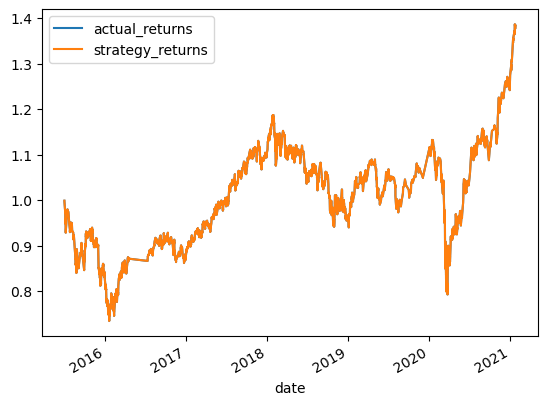

In [148]:
# Calculate and plot the cumulative returns for the `actual_returns` and the `trading_algorithm_returns`
(1 + predictions_df[["actual_returns", "strategy_returns"]]).cumprod().plot()

In [149]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [150]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [151]:
# Fit the LogisticRegression model
logistic_regression_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [152]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions
lr_training_signal_predictions

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [153]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, lr_training_signal_predictions)

# Review the classification report
print(lr_training_report)

              precision    recall  f1-score   support

        -1.0       0.67      0.08      0.15        49
         1.0       0.64      0.98      0.77        81

    accuracy                           0.64       130
   macro avg       0.65      0.53      0.46       130
weighted avg       0.65      0.64      0.54       130



In [154]:
# Use the trained model to predict the trading signals for the testing data.
lr_testing_signal_predictions = logistic_regression_model.predict(X_test_scaled)

In [155]:
# Generate a classification report using the testing data and the logistic regression model's predictions
lr_testing_report = classification_report(y_test, lr_testing_signal_predictions)

# Review the testing classification report
print(lr_testing_report)

              precision    recall  f1-score   support

        -1.0       0.44      0.33      0.37      1806
         1.0       0.56      0.66      0.61      2288

    accuracy                           0.52      4094
   macro avg       0.50      0.50      0.49      4094
weighted avg       0.50      0.52      0.50      4094



In [156]:
# Print the classification report for the Logistic Regression model using the test data
print("Logistic Regression Classification Report")
print(lr_testing_report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

        -1.0       0.44      0.33      0.37      1806
         1.0       0.56      0.66      0.61      2288

    accuracy                           0.52      4094
   macro avg       0.50      0.50      0.49      4094
weighted avg       0.50      0.52      0.50      4094



In [157]:
# Print the classification report for the SVM model using the test data
print("SVM Classification Report")
print(svm_testing_report)

SVM Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1806
         1.0       0.56      1.00      0.72      2288

    accuracy                           0.56      4094
   macro avg       0.28      0.50      0.36      4094
weighted avg       0.31      0.56      0.40      4094



In [ ]:
#conclusion: the SVM model fit better because the accuracy is higher 0.56 than fron the logistic regression model which is low 0.52 in other hand the SVM model has the lowest recall score in -1.0.lastly the best model will depend on the objective of the predicting or a overal long term investissment 